In [2]:
import json
import os
from math import ceil

import matplotlib.pyplot as plt
import pandas as pd

In [1]:
def n_bins(values):
    sorted_values = sorted(values)
    length = len(sorted_values)
    q1 = ceil(length / 4)
    q3 = ceil(length * 3 / 4)
    IQR = calcium_lengths[q3 - 1] - calcium_lengths[q1 - 1]
    h = 2 * IQR * (length ** (-1/3))
    max_value = max(calcium_lengths)
    min_value = min(calcium_lengths)
    return ceil((max_value - min_value) / h)

In [3]:
with open('../results/hp_cr/model_3/metrics.json', 'r') as json_file:
    data = json.load(json_file)

In [10]:
lengths = [
    len(data['metrics']['1']['train_cnn'][pb_name]['pred'])
    for pb_name in data['metrics']['1']['train_cnn'].keys()
]

20 230


(array([4., 6., 7., 4., 5., 1., 3., 2.]),
 array([ 20.  ,  46.25,  72.5 ,  98.75, 125.  , 151.25, 177.5 , 203.75,
        230.  ]),
 <BarContainer object of 8 artists>)

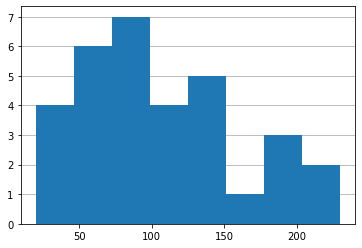

In [76]:
fig1, axs1 = plt.subplots(1, 1)
axs1.grid(axis='y')
axs1.set_axisbelow(True)
axs1.hist(lengths, bins=n_bins(lengths))

{'whiskers': [<matplotlib.lines.Line2D at 0x2cdd4d69bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x2cdd4d781f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cdd4d69820>],
 'medians': [<matplotlib.lines.Line2D at 0x2cdd4d788b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cdd4d78c10>],
 'means': []}

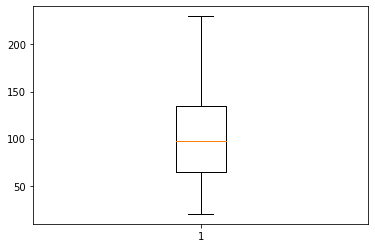

In [79]:
fig1, axs1 = plt.subplots(1, 1)
axs1.boxplot(lengths)

In [31]:
def get_calcium_lengths(sequence):
    lengths = []
    current_length = 0
    for element in sequence:
        current_length += element
        if current_length > 0 and element == 0:
            lengths.append(current_length)
            current_length = 0

    if current_length > 0:
        lengths.append(current_length)

    return lengths

In [47]:
calcium_lengths = [
    length
    for pb_name in data['metrics']['1']['train_cnn'].keys()
    for length in get_calcium_lengths(data['metrics']['1']['train_cnn'][pb_name]['real'])
]

(array([40.,  8.,  6.,  1.,  4.,  3.,  1.,  1.,  0.,  2.]),
 array([  1. ,  14.1,  27.2,  40.3,  53.4,  66.5,  79.6,  92.7, 105.8,
        118.9, 132. ]),
 <BarContainer object of 10 artists>)

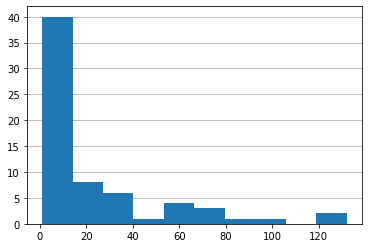

In [77]:
fig1, axs1 = plt.subplots(1, 1)
axs1.grid(axis='y')
axs1.set_axisbelow(True)
axs1.hist(calcium_lengths, bins=n_bins(calcium_lengths))

{'whiskers': [<matplotlib.lines.Line2D at 0x2cdd4d13130>,
 'caps': [<matplotlib.lines.Line2D at 0x2cdd4d137f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cdd4d04d90>],
 'medians': [<matplotlib.lines.Line2D at 0x2cdd4d13ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cdd4d20280>],
 'means': []}

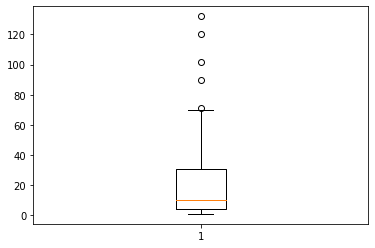

In [78]:
fig1, axs1 = plt.subplots(1, 1)
axs1.boxplot(calcium_lengths)

dict_keys(['f1', 'rec', 'fp', 'pre', 'fn', 'acc', 'total', 'tp', 'tn', 'real', 'pred'])